CS 131 - Mini Project Group 8:
* Tien Ly
* Jewon Yeon
* Divij Gupta

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/tntly/cs131/main/MiniProjectGroup8/east_asia_top_tracks.csv', index_col=0)
df.head()

,song_name,album_name,album_link,artist_name,popularity,release_date,song_link,duration_ms,explicit,query_genre
0,Cupid - Twin Ver.,The Beginning: Cupid,https://open.spotify.com/album/5letLUZIFsQikJY...,FIFTY FIFTY,98,2023-02-24,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,174253,False,k-pop
1,Seven (feat. Latto) (Explicit Ver.),Seven (feat. Latto),https://open.spotify.com/album/53985D8g3JcGBoU...,Jung Kook,97,2023-07-14,https://open.spotify.com/track/7x9aauaA9cu6tyf...,184400,True,k-pop
2,Like Crazy,FACE,https://open.spotify.com/album/4xc3Lc9yASZgEJG...,Jimin,96,2023-03-24,https://open.spotify.com/track/3Ua0m0YmEjrMi9X...,212241,False,k-pop
3,MONEY,LALISA,https://open.spotify.com/album/4ASxFYWyk2216Ol...,LISA,96,2021-09-10,https://open.spotify.com/track/45OX2jjEw1l7lOF...,168227,False,k-pop
4,Take Two,Take Two,https://open.spotify.com/album/3jeQDa9OFZ6GndL...,BTS,95,2023-06-09,https://open.spotify.com/track/5IAESfJjmOYu7cH...,229953,False,k-pop


In [2]:
df.release_date[5370] = '1988-08-24'
df.release_date = pd.to_datetime(df.release_date)

<ipython-input-2-f70a72738f00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.release_date[5370] = '1988-08-24'


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   song_name     7000 non-null   object        
 1   album_name    7000 non-null   object        
 2   album_link    7000 non-null   object        
 3   artist_name   7000 non-null   object        
 4   popularity    7000 non-null   int64         
 5   release_date  7000 non-null   datetime64[ns]
 6   song_link     7000 non-null   object        
 7   duration_ms   7000 non-null   int64         
 8   explicit      7000 non-null   bool          
 9   query_genre   7000 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 811.8+ KB


## Pre-processing

In [4]:
df.query_genre.unique()

array(['k-pop', 'j-pop', 'japanese', 'korean', 'j-dance', 'chinese',
       'j-idol'], dtype=object)

In [5]:
df_cn = df[df.query_genre == 'chinese']
df_cn.shape

(1000, 10)

In [6]:
df_kr = df[(df.query_genre == 'k-pop') | (df.query_genre == 'korean')]
df_kr.shape

(2000, 10)

In [7]:
df_jp = df[df.query_genre.isin(['j-pop', 'japanese', 'j-dance', 'j-idol'])]
df_jp.shape

(4000, 10)

In [8]:
df_cn = df_cn[df_cn.popularity >= 70].drop_duplicates(subset=['song_link'])
df_cn.shape

(4, 10)

In [9]:
df_kr = df_kr[df_kr.popularity >= 70].drop_duplicates(subset=['song_link'])
df_kr.shape

(306, 10)

In [10]:
df_jp = df_jp[df_jp.popularity >= 70].drop_duplicates(subset=['song_link'])
df_jp.shape

(103, 10)

## Task 1

Does a song's length influence its chance of becoming popular? What about the song's content (explicit vs. non-explicit) -> **Hypothesis**: songs that are shorter and non-explicit have a higher chance of becoming hit.
* `duration_ms`: Determine the average duration for each file, then convert it to minutes
* `explicit`: Determine the proportion of explicit to non-explicit songs for each file
* Was the hypothesis correct?


### durations_ms

In [11]:
for lan in [df_cn, df_kr, df_jp]:
  print(lan.duration_ms.mean() / 60000)

4.5486625
3.257780337690632
3.8713270226537215


In [12]:
df_cn['language'] = 'Chinese'
df_kr['language'] = 'Korean'
df_jp['language'] = 'Japanese'
df_concat = pd.concat([df_cn, df_kr, df_jp])
df_concat['duration_min'] = df_concat.duration_ms / 60000

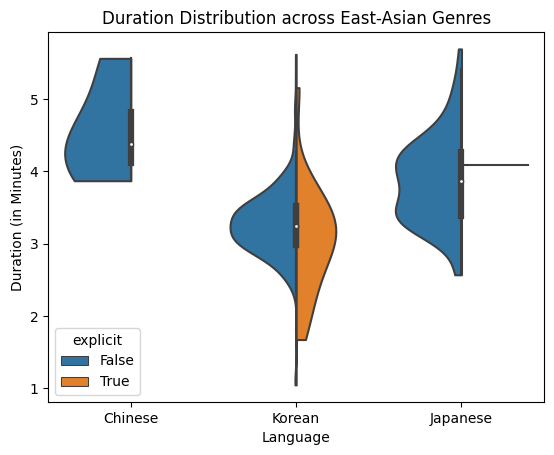

In [13]:
sns.violinplot(data=df_concat, x='language', y='duration_min',
               hue='explicit', split=True, cut=0, density_norm='count')

plt.xlabel('Language')
plt.ylabel('Duration (in Minutes)')
plt.title('Duration Distribution across East-Asian Genres');

### explicit

In [14]:
for lan in [df_cn, df_kr, df_jp]:
  print(lan[lan.explicit == True].shape[0])
  print(lan[lan.explicit == True].shape[0] / lan.shape[0] * 100)
  print()

0
0.0

26
8.49673202614379

1
0.9708737864077669



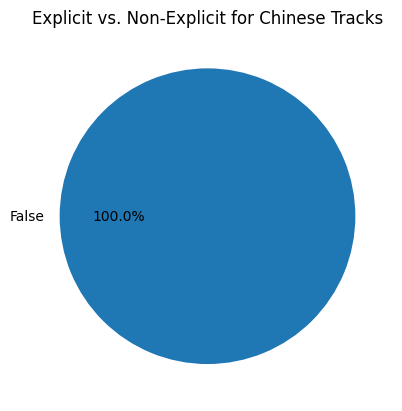

In [15]:
plt.pie(df_cn.explicit.value_counts(), labels=df_cn.explicit.value_counts().index, autopct='%.1f%%')
plt.title('Explicit vs. Non-Explicit for Chinese Tracks');

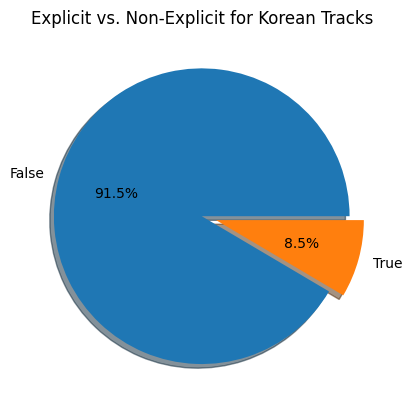

In [16]:
plt.pie(df_kr.explicit.value_counts(), labels=df_kr.explicit.value_counts().index, autopct='%.1f%%',
        explode=(0, 0.1), shadow=True, startangle=360)
plt.title('Explicit vs. Non-Explicit for Korean Tracks');

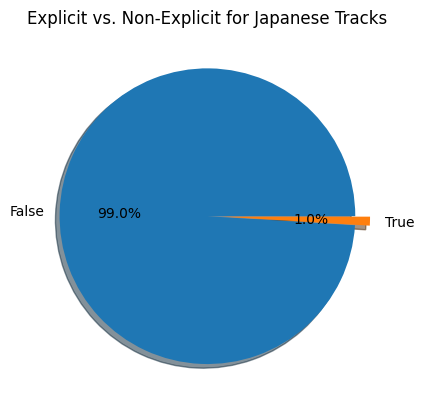

In [17]:
plt.pie(df_jp.explicit.value_counts(), labels=df_jp.explicit.value_counts().index, autopct='%.1f%%',
        explode=(0, 0.1), shadow=True, startangle=360)
plt.title('Explicit vs. Non-Explicit for Japanese Tracks');

## Task 2

Who are the popular artists from the past few years? Which songs have remained popular over time?
* `artist_name`: List the top 5 artists with the most songs for each file
* `release_date`: List the 5 oldest songs in each file

### artist_name

In [18]:
df_cn.artist_name.value_counts().head()

WeiBird    1
张远         1
小阿七        1
WayV       1
Name: artist_name, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24352 (\N{CJK UNIFIED IDEOGRAPH-5F20}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 36828 (\N{CJK UNIFIED IDEOGRAPH-8FDC}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 19971 (\N{CJK UNIFIED IDEOGRAPH-4E03}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24352 (\N{CJK UNIFIED IDEOGRA

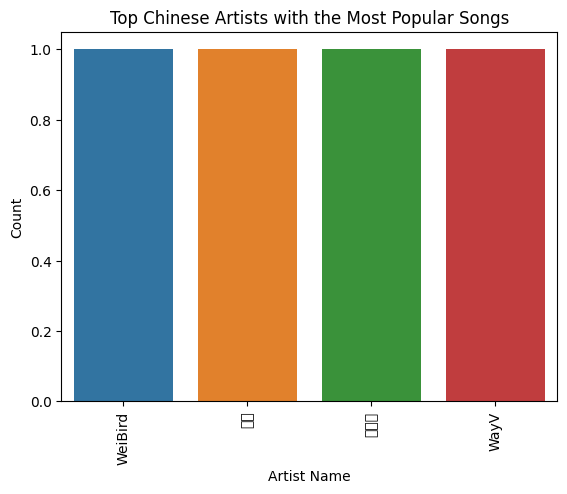

In [19]:
sns.countplot(df_cn, x='artist_name')

plt.xlabel('Artist Name')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Top Chinese Artists with the Most Popular Songs');

In [21]:
df_kr.artist_name.value_counts().head()

BLACKPINK              25
SEVENTEEN              20
EXO                    17
TOMORROW X TOGETHER    15
ENHYPEN                15
Name: artist_name, dtype: int64

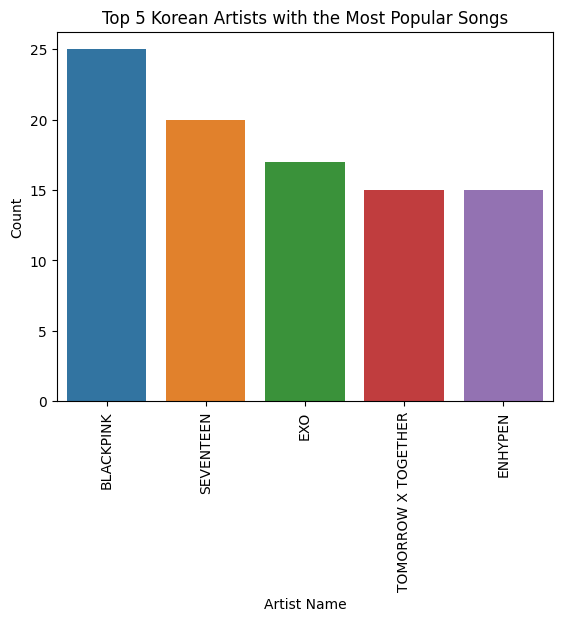

In [22]:
sns.countplot(df_kr, x='artist_name',
              order=df_kr['artist_name'].value_counts().nlargest(5).index)

plt.xlabel('Artist Name')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Top 5 Korean Artists with the Most Popular Songs');

In [23]:
df_jp.artist_name.value_counts().head()

YOASOBI                  12
Mrs. GREEN APPLE         12
Vaundy                    8
Kenshi Yonezu             5
OFFICIAL HIGE DANDISM     5
Name: artist_name, dtype: int64

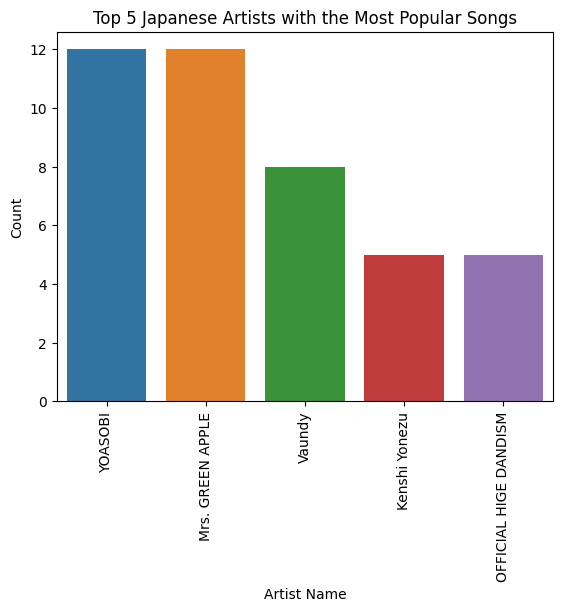

In [24]:
sns.countplot(df_jp, x='artist_name',
              order=df_jp['artist_name'].value_counts().nlargest(5).index)

plt.xlabel('Artist Name')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Top 5 Japanese Artists with the Most Popular Songs');

### release_date

In [25]:
df_cn.sort_values(by='release_date').head()

,song_name,album_name,album_link,artist_name,popularity,release_date,song_link,duration_ms,explicit,query_genre,language
441,Love Talk - English Version,Love Talk (English Version),https://open.spotify.com/album/60A7gFYvWmaDULm...,WayV,70,2019-11-05,https://open.spotify.com/track/2e3cJdJ8xWwydl8...,232150,False,chinese,Chinese
335,嘉宾,嘉宾,https://open.spotify.com/album/1orkuJNHCx51s1B...,张远,71,2020-10-26,https://open.spotify.com/track/1IVj6CsBbTgOEpo...,333628,False,chinese,Chinese
313,"如果可以 - 電影""月老""主題曲","如果可以 (電影""月老""主題曲)",https://open.spotify.com/album/6CGKNcn63JbPWlj...,WeiBird,72,2021-11-05,https://open.spotify.com/track/72OVnXDzugvrCU2...,274400,False,chinese,Chinese
336,从前说,从前说,https://open.spotify.com/album/3XKhqXwWo2nHfTC...,小阿七,71,2021-12-29,https://open.spotify.com/track/3t5edAHbyFEW67w...,251501,False,chinese,Chinese


In [26]:
df_kr.sort_values(by='release_date').head()

,song_name,album_name,album_link,artist_name,popularity,release_date,song_link,duration_ms,explicit,query_genre,language
380,4:00A.M.,MIGNONNE (Mastered by Bernie Grundman),https://open.spotify.com/album/0Y4RPWAZZui6gUL...,Taeko Onuki,71,1978-09-21,https://open.spotify.com/track/0zoGVO4bQXG8U6C...,336960,False,k-pop,Korean
220,River Flows In You,First Love (The Original & the Very First Reco...,https://open.spotify.com/album/1N6p8qmf8PJgYQd...,Yiruma,74,2001-11-27,https://open.spotify.com/track/2agBDIr9MYDUduc...,188786,False,korean,Korean
375,Replay,The SHINee World - The First Album,https://open.spotify.com/album/2aiM53N5DGm5VXn...,SHINee,71,2008-08-28,https://open.spotify.com/track/1rp986nzkyAX1wF...,213826,False,k-pop,Korean
450,Ichu Ichu,Vedi (Original Motion Picture Soundtrack),https://open.spotify.com/album/3ydUAixcKFc94zV...,Vijay Antony,70,2011-09-05,https://open.spotify.com/track/3ysUkfcrFwvXweD...,226698,False,k-pop,Korean
423,"눈,코,입 (Eyes, Nose, Lips)",RISE,https://open.spotify.com/album/1Y9so4jq4t4taAH...,TAEYANG,70,2014-06-03,https://open.spotify.com/track/0lYtIvI7bO51PZS...,229989,False,korean,Korean


In [27]:
df_jp.sort_values(by='release_date').head()

,song_name,album_name,album_link,artist_name,popularity,release_date,song_link,duration_ms,explicit,query_genre,language
416,チェリー,インディゴ地平線,https://open.spotify.com/album/0GB573iZ4z6gre3...,SPITZ,70,1996-01-01,https://open.spotify.com/track/1ihCiJaXRl4f6Sy...,259933,False,j-pop,Japanese
266,First Love,First Love,https://open.spotify.com/album/29U9LtzSF0ftWiL...,Hikaru Utada,73,1999-03-10,https://open.spotify.com/track/39HrUxcvKF3jtLz...,257293,False,j-pop,Japanese
144,"Tokyo Drift (Fast & Furious) - From ""The Fast ...",Tokyo Drift (Fast & Furious),https://open.spotify.com/album/5SXTscj33KnBUpD...,Teriyaki Boyz,76,2006-01-01,https://open.spotify.com/track/0upFohXrGxIIAjy...,255946,False,japanese,Japanese
176,unravel,Fantastic Magic,https://open.spotify.com/album/1jLua47U6YKYY4G...,TK from Ling tosite sigure,75,2014-08-27,https://open.spotify.com/track/1rN9QoVxw5U7TJk...,238360,False,j-pop,Japanese
287,Gyal You a Party Animal,Gyal You a Party Animal,https://open.spotify.com/album/0AuidICCpJQTwjM...,Charly Black,72,2015-01-01,https://open.spotify.com/track/6bOLRTULQUiXeVn...,214455,False,j-dance,Japanese


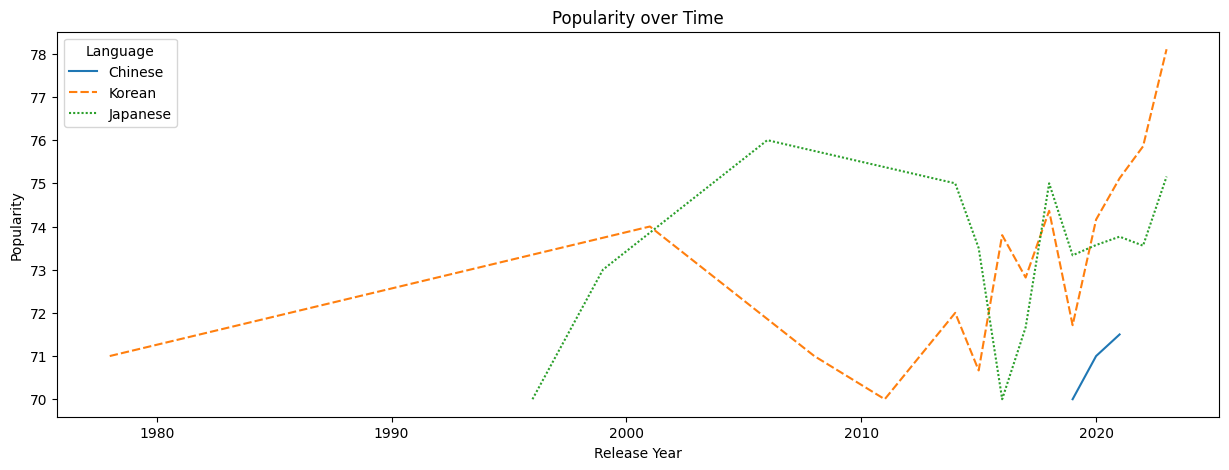

In [29]:
plt.figure(figsize=(15,5))

sns.lineplot(data=df_concat, x=df_concat.release_date.dt.year, y='popularity',
             errorbar=None, hue='language', style='language')

plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.legend(title='Language')
plt.title('Popularity over Time');